<a href="https://colab.research.google.com/github/ParsaKeerthana/DataMiningAssignment/blob/main/DataMiningAssignment2BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [2]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 37.7 MB/s eta 0:0

In [3]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('/content/seattle-weather.csv')
dataset.shape
dataset.head

<bound method NDFrame.head of             date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]>

In [4]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Modelling Data: ' + str(data.shape))
print('Unseen Data : ' + str(data_unseen.shape))

Modelling Data: (1388, 6)
Unseen Data : (73, 6)


In [7]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'weather', session_id=123)

,Description,Value
0,Session id,123
1,Target,weather
2,Target type,Multiclass
3,Target mapping,"drizzle: 0, fog: 1, rain: 2, snow: 3, sun: 4"
4,Original data shape,"(1388, 6)"
5,Transformed data shape,"(1388, 6)"
6,Transformed train set shape,"(971, 6)"
7,Transformed test set shape,"(417, 6)"
8,Numeric features,4
9,Categorical features,1


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8301,0.9225,0.8301,0.7473,0.7802,0.6995,0.7219,1.2910
knn,K Neighbors Classifier,0.7569,0.8596,0.7569,0.7258,0.7355,0.5853,0.5905,0.2260
ridge,Ridge Classifier,0.7158,0.0000,0.7158,0.6314,0.6679,0.4953,0.5091,0.3000
svm,SVM - Linear Kernel,0.7095,0.0000,0.7095,0.6484,0.6541,0.4981,0.5309,0.1630
dummy,Dummy Classifier,0.4377,0.5000,0.4377,0.1916,0.2665,0.0000,0.0000,0.2230
ada,Ada Boost Classifier,0.4356,0.5000,0.4356,0.1898,0.2644,0.0000,0.0000,0.6180
xgboost,Extreme Gradient Boosting,0.3286,0.5918,0.3286,0.1729,0.2239,-0.0327,-0.0519,0.3580
qda,Quadratic Discriminant Analysis,0.2026,0.2000,0.2026,0.0779,0.1092,0.0000,0.0000,0.2090
et,Extra Trees Classifier,0.1812,0.6456,0.1812,0.1306,0.1462,-0.0842,-0.1169,0.8980
rf,Random Forest Classifier,0.0906,0.5271,0.0906,0.0622,0.0637,-0.2435,-0.3267,0.7610


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0204,0.5000,0.0204,0.0004,0.0008,0.0000,0.0000
1,0.0206,0.5000,0.0206,0.0004,0.0008,0.0000,0.0000
2,0.0103,0.5000,0.0103,0.0001,0.0002,0.0000,0.0000
3,0.0103,0.5000,0.0103,0.0001,0.0002,0.0000,0.0000
4,0.0103,0.5000,0.0103,0.0001,0.0002,0.0000,0.0000
5,0.0206,0.5000,0.0206,0.0004,0.0008,0.0000,0.0000
6,0.0206,0.5000,0.0206,0.0004,0.0008,0.0000,0.0000
7,0.0206,0.5000,0.0206,0.0004,0.0008,0.0000,0.0000
8,0.0206,0.5000,0.0206,0.0004,0.0008,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.1020,0.5149,0.1020,0.0596,0.0703,-0.2421,-0.3209
1,0.2062,0.5769,0.2062,0.1223,0.1491,-0.1489,-0.1970
2,0.0722,0.4980,0.0722,0.0461,0.0532,-0.2707,-0.3623
3,0.0825,0.5385,0.0825,0.0517,0.0606,-0.2535,-0.3416
4,0.0515,0.5438,0.0515,0.0329,0.0370,-0.2521,-0.3363
5,0.0515,0.4967,0.0515,0.0242,0.0284,-0.2794,-0.3798
6,0.0825,0.5609,0.0825,0.1119,0.0642,-0.2386,-0.3213
7,0.1340,0.5163,0.1340,0.0757,0.0922,-0.2243,-0.3034
8,0.0619,0.4803,0.0619,0.0314,0.0370,-0.2728,-0.3675


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7245,0.8290,0.7245,0.7629,0.7106,0.5634,0.5976
1,0.7629,0.8558,0.7629,0.7567,0.7327,0.6034,0.6358
2,0.6804,0.8237,0.6804,0.6802,0.6743,0.4842,0.4948
3,0.7423,0.8211,0.7423,0.7462,0.7230,0.5737,0.6001
4,0.7320,0.8933,0.7320,0.7682,0.7216,0.5660,0.5990
5,0.7629,0.8703,0.7629,0.7827,0.7482,0.6153,0.6429
6,0.7938,0.8998,0.7938,0.7780,0.7671,0.6560,0.6795
7,0.6907,0.8809,0.6907,0.6456,0.6571,0.4630,0.4813
8,0.6804,0.8436,0.6804,0.7657,0.6764,0.5099,0.5533


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


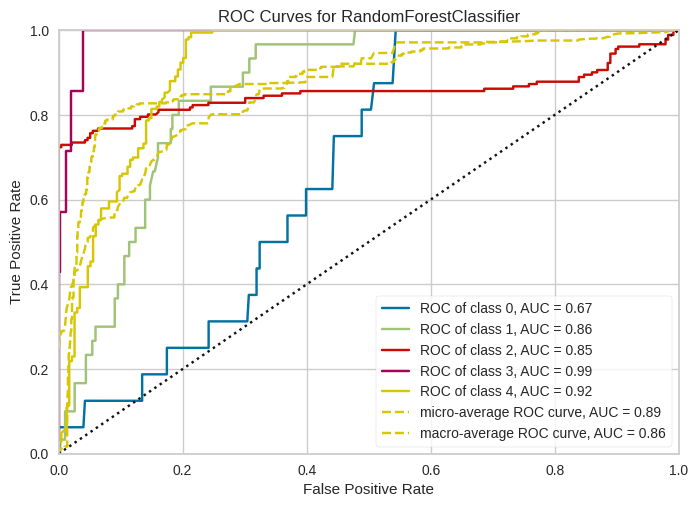

In [13]:
plot_model(tuned_rf, plot = 'auc')


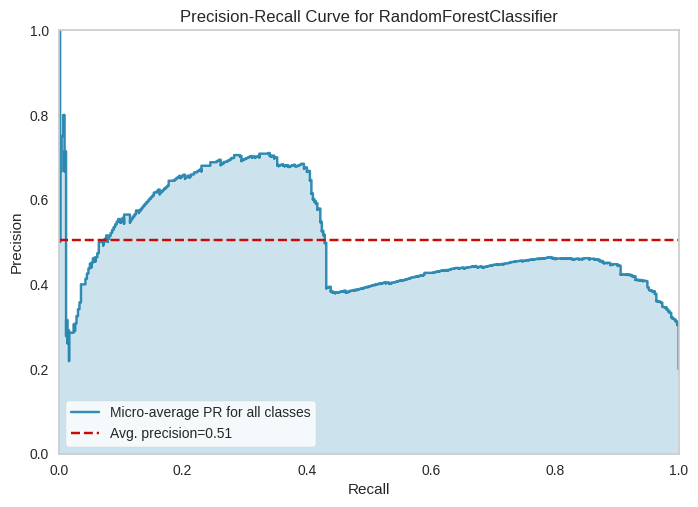

In [14]:
plot_model(tuned_rf, plot = 'pr')

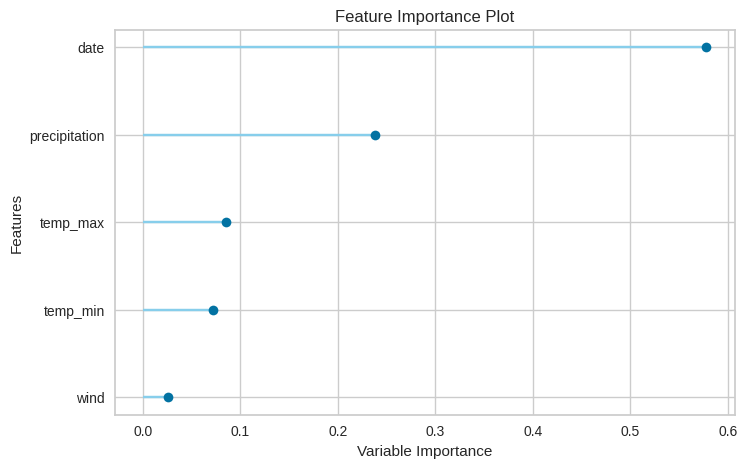

In [15]:
plot_model(tuned_rf, plot = 'feature')

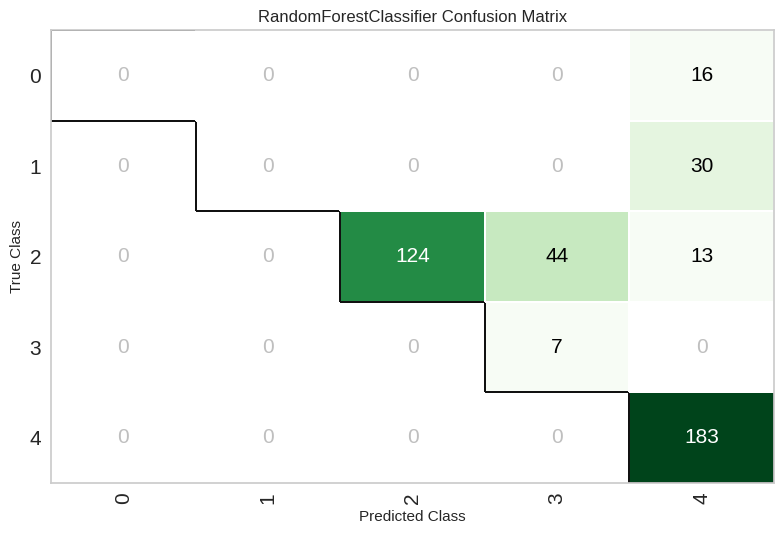

In [16]:
plot_model(tuned_rf, plot = 'confusion_matrix')

In [17]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7530,0.8774,0.7530,0.7682,0.7349,0.5978,0.6273
